In [1]:
#import packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
plt.rcParams['figure.figsize']=(20.0,10.0)
from mpl_toolkits.mplot3d import Axes3D
data=pd.read_csv("C:/Users/aksha/Desktop/ai/datasets/student.csv")
print("data.shape")
data.head()

data.shape


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


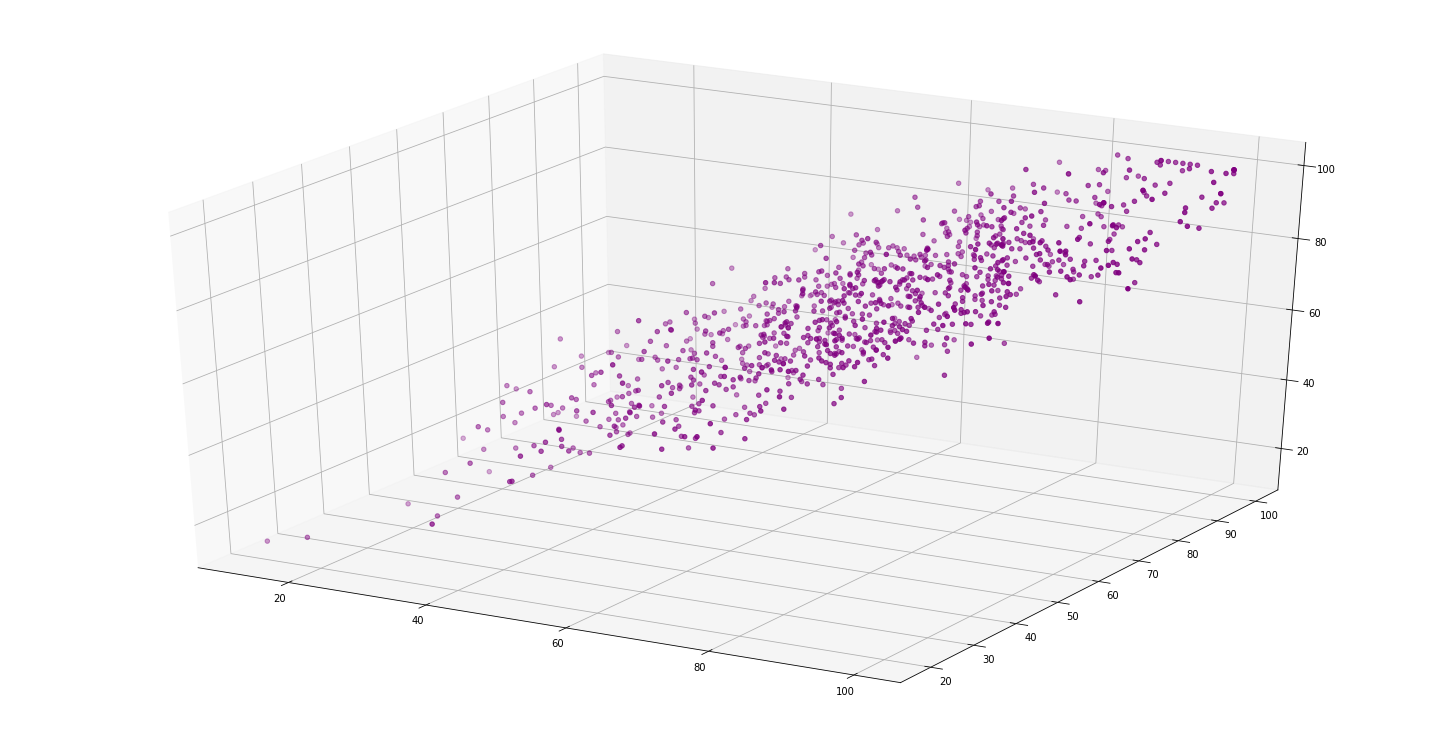

In [41]:
math=data['Math'].values
read=data['Reading'].values
write=data['Writing'].values
#Using Scatter plot
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(math,read,write,color="Purple")
plt.show()

In [49]:
#Now we will generate our X,Y and B
m=len(math)
x0=np.ones(m)
X=np.array([x0,math,read]).T
#Initial Coefficients
B=np.array([0,0,0])
Y=np.array(write)
alpha=0.0001

# we will define our cost function

In [50]:
def cost_function(X,Y,B):
    m=len(Y)
    J=np.sum((X.dot(B)-Y)**2)/(2*m)
    return J

In [51]:
initial_cost=cost_function(X,Y,B)
print(initial_cost)

2470.11


In [52]:
def gradient_descent(X,Y,B,alpha,iterations):
    cost_history=[0]*iterations
    m=len(Y)
    for iteration in range(iterations):
        #Hypothesis values
        h=X.dot(B)
        #Difference b/w Hypothesis and Actual Y
        loss=h-Y
        #Gradient Calculation 
        gradient=X.T.dot(loss)/m
        #Changing Values of B using Gradient
        B=B-alpha*gradient
        #New cost value
        cost=cost_function(X,Y,B)
        cost_history[iteration]=cost
        
    return B,cost_history

In [53]:
#10000 iterations
newB,cost_history=gradient_descent(X,Y,B,alpha,100000)
#New values of B
print(newB)
#Final cost of newB
print(cost_history[-1])

[-0.47889172  0.09137252  0.90144884]
10.475123473539167


In [61]:
#Rmse
def rmse(Y,Y_pred):
    rmse=np.sqrt(sum((Y-Y_pred)**2)/len(Y))
    return rmse
#R2 score
def r2_score(Y,Y_pred):
    mean_Y=np.mean(Y)
    ss_t=sum((Y-mean_Y)**2)
    ss_r=sum((Y-Y_pred)**2)
    r2=1-(ss_r/ss_t)
    return r2
Y_pred=X.dot(newB)
print(rmse(Y,Y_pred))
print(r2_score(Y,Y_pred))

4.577143972727789
0.9097223273061553


# Using Machine Learning

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#X and Y values
X=np.array([math,read]).T
Y=np.array(write)
#Model Initialization
reg=LinearRegression()
#DataFitting
reg=reg.fit(X,Y)
#Y prediction
Y_pred=reg.predict(X)
#Model Evaluation
rmse=np.sqrt(mean_squared_error(Y,Y_pred))
r2=reg.score(X,Y)
print(rmse)
print(r2)

4.572887051836439
0.9098901726717316


In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

data=pd.read_csv('C:/Users/aksha/Desktop/ai/datasets/student.csv')
df=pd.DataFrame(data)
X=add_constant(df)

In [7]:
pd.Series([variance_inflation_factor(X.values,i)
          for i in range(X.shape[1])],
          index=X.columns)

const      24.937662
Math        2.960544
Reading    11.368520
Writing    11.097569
dtype: float64

In [2]:
#one way frequency
import os
os.chdir("C:/Users/aksha/Desktop/ai/datasets") #set working directory
train=pd.read_csv("diamonds.csv")                #read the data

In [3]:
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
train.shape

(53940, 10)

In [5]:
my_tab=pd.crosstab(train['clarity'],columns='count')
my_tab

col_0,count
clarity,
I1,741
IF,1790
SI1,13065
SI2,9194
VS1,8171
VS2,12258
VVS1,3655
VVS2,5066


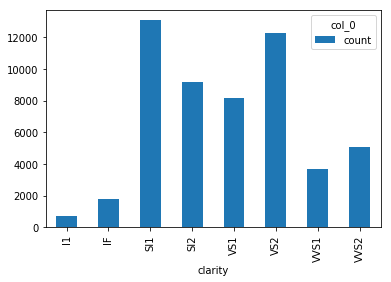

In [6]:
my_tab.plot.bar()

In [7]:
my_tab/my_tab.sum()

col_0,count
clarity,
I1,0.013737
IF,0.033185
SI1,0.242214
SI2,0.170449
VS1,0.151483
VS2,0.227253
VVS1,0.067760
VVS2,0.093919


#Two way frequency table

In [8]:
clarity_color_table=pd.crosstab(index=train['clarity'],columns=train['color'])
clarity_color_table

color,D,E,F,G,H,I,J
clarity,,,,,,,
I1,42,102,143,150,162,92,50
IF,73,158,385,681,299,143,51
SI1,2083,2426,2131,1976,2275,1424,750
SI2,1370,1713,1609,1548,1563,912,479
VS1,705,1281,1364,2148,1169,962,542
VS2,1697,2470,2201,2347,1643,1169,731
VVS1,252,656,734,999,585,355,74
VVS2,553,991,975,1443,608,365,131


In [10]:
#Test of independence(ANOVA TEST) chi square test
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(train['clarity'],train['color']))[0:3]


(2047.0791639481313, 0.0, 42)